In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
df = gpd.read_file("F:/RMonaghan_Workspace/Projects/NASA_SC_Digi/Projects/onetofour/onetofour.gdb", layer='EVAA_S2_Merged')
df['PostFire_S2_Date'] = pd.to_datetime(df['PostFire_S2_Date'])
df['Month'] = df['PostFire_S2_Date'].dt.month
df['Year'] = df['PostFire_S2_Date'].dt.year
df['Burn Count'] = 1
df = df.reset_index()

In [3]:
months = pd.DataFrame({"Month":np.arange(1,13,1)})
months2 = pd.DataFrame({"Month":np.arange(1,13,1)})
months['Year'] = 2022
months2['Year'] = 2023

months_lis = [months,months2]

all_months = pd.concat(months_lis)
all_months

Month  Year
0       1  2022
1       2  2022
2       3  2022
3       4  2022
4       5  2022
5       6  2022
6       7  2022
7       8  2022
8       9  2022
9      10  2022
10     11  2022
11     12  2022
0       1  2023
1       2  2023
2       3  2023
3       4  2023
4       5  2023
5       6  2023
6       7  2023
7       8  2023
8       9  2023
9      10  2023
10     11  2023
11     12  2023

In [7]:
df = df[~df['Month'].isnull()]

In [8]:
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)

df = df[['Month', 'Year', 'Burn Count', 'Shape_Area']]

df

Month  Year  Burn Count    Shape_Area
0       12  2023           1  8.061982e+05
1       12  2022           1  1.260401e+06
2       12  2022           1  6.155359e+05
3       12  2022           1  4.819558e+05
4       12  2022           1  7.071218e+05
..     ...   ...         ...           ...
595      1  2023           1  1.458290e+05
596      1  2023           1  1.653089e+05
597      1  2023           1  1.327264e+05
598      1  2023           1  1.694582e+05
599      1  2023           1  1.740575e+05

[598 rows x 4 columns]

In [9]:
grouped = df.groupby(['Month', 'Year']).sum()
all_mos = pd.merge(all_months, grouped, on=['Month', 'Year'], how='outer')
all_mos['Burn Count'].fillna(0, inplace=True)
all_mos['Burn Count'] = all_mos['Burn Count'].astype(int)
# all_mos['Month Name'] = all_mos['Month'].dt.month_name()


all_mos['Month & Year'] = '0' + all_mos['Month'].astype(str) + '-' + all_mos['Year'].astype(str)
all_mos['Area (km²)'] = (all_mos['Shape_Area'] * 0.000001).round(0)
all_mos.iloc[9:12, 4] = all_mos.iloc[9:12, 4].replace({'010-2022': '10-2022', '011-2022':'11-2022', '012-2022':'12-2022'})
all_mos.iloc[21:, 4] = all_mos.iloc[21:, 4].replace({'010-2023': '10-2023', '011-2023':'11-2023', '012-2023':'12-2023'})
all_mos['Area (km²)'].fillna(0, inplace=True)

all_mos

Month  Year  Burn Count    Shape_Area Month & Year  Area (km²)
0       1  2022           0           NaN      01-2022         0.0
1       2  2022           0           NaN      02-2022         0.0
2       3  2022           0           NaN      03-2022         0.0
3       4  2022           0           NaN      04-2022         0.0
4       5  2022           0           NaN      05-2022         0.0
5       6  2022           0           NaN      06-2022         0.0
6       7  2022           0           NaN      07-2022         0.0
7       8  2022           2  1.073032e+06      08-2022         1.0
8       9  2022          13  7.251097e+06      09-2022         7.0
9      10  2022          76  1.896976e+07      10-2022        19.0
10     11  2022          50  1.373763e+07      11-2022        14.0
11     12  2022          52  1.414977e+07      12-2022        14.0
12      1  2023         234  7.132070e+07      01-2023        71.0
13      2  2023         121  4.404186e+07      02-2023        44.0
14      3  2023          38  1.455741e+07      03-2023        15.0
15      4  2023           0           NaN      04-2023         0.0
16      5  2023           0           NaN      05-2023         0.0
17      6  2023           0           NaN      06-2023         0.0
18      7  2023           0           NaN      07-2023         0.0
19      8  2023           0           NaN      08-2023         0.0
20      9  2023           0           NaN      09-2023         0.0
21     10  2023           0           NaN      10-2023         0.0
22     11  2023           0           NaN      11-2023         0.0
23     12  2023           9  3.259907e+06      12-2023         3.0
24     12  2021           3  3.110014e+05     012-2021         0.0

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '01-2022'),
  Text(1, 0, '02-2022'),
  Text(2, 0, '03-2022'),
  Text(3, 0, '04-2022'),
  Text(4, 0, '05-2022'),
  Text(5, 0, '06-2022'),
  Text(6, 0, '07-2022'),
  Text(7, 0, '08-2022'),
  Text(8, 0, '09-2022'),
  Text(9, 0, '10-2022'),
  Text(10, 0, '11-2022'),
  Text(11, 0, '12-2022'),
  Text(12, 0, '01-2023'),
  Text(13, 0, '02-2023'),
  Text(14, 0, '03-2023'),
  Text(15, 0, '04-2023'),
  Text(16, 0, '05-2023'),
  Text(17, 0, '06-2023'),
  Text(18, 0, '07-2023'),
  Text(19, 0, '08-2023'),
  Text(20, 0, '09-2023'),
  Text(21, 0, '10-2023'),
  Text(22, 0, '11-2023'),
  Text(23, 0, '12-2023'),
  Text(24, 0, '012-2021')])

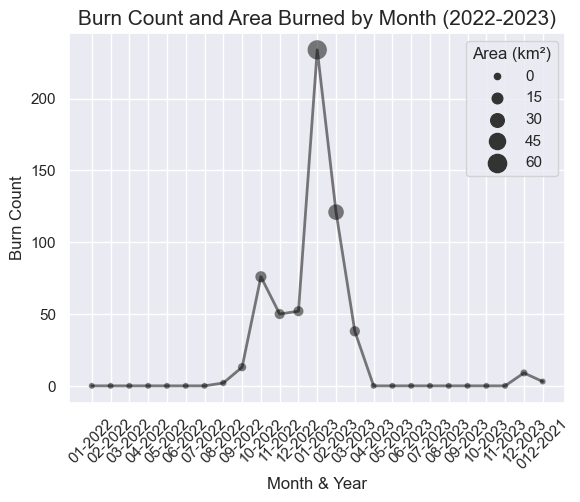

In [10]:
# sns.lineplot(data=all_mos, x='Month & Year', y='Burn Count', palette='coolwarm_r')
sns.set_theme('notebook')
# sns.set_palette("coolwarm")
sns.lineplot(data=all_mos, x='Month & Year', y='Burn Count', linewidth=2, color='black', alpha=0.5)  #.set(title='Burn Count and Area Burned by Month (2022-2023)')
# sns.scatterplot(data=all_mos, x='Month & Year', y='Burn Count', cmap='viridis')
sns.scatterplot(data=all_mos, x='Month & Year', y='Burn Count', size='Area (km²)', sizes=(20, 200), color='black', alpha=0.5)
# sns.set_palette("coolwarm")
# sns.scatterplot(data=all_mos, x='Month & Year', y='Area', palette='coolwarm')

plt.title('Burn Count and Area Burned by Month (2022-2023)', fontsize=15)
plt.xticks()
plt.xticks(rotation=45)

# sns.set_title('Burn Count and Area Burned by Month (2022-2023)')

In [11]:
all_burns = gpd.read_file('F:/RMonaghan_Workspace/Projects/NASA_SC_Digi/Projects/onetofour/onetofour.gdb', layer='EVAA_S2_Merged')
OBA_22 = gpd.read_file("F:/RMonaghan_Workspace/Data/Permits_2022_2023_Copy/FL_2022_OBA_PT.shp")
OBA_23 = gpd.read_file('F:/Fire_GIS/Permits/FL_2023_Permits/FL_OBA_2023_toDate_ALB_PT.shp')
all_burns

PreFire_S2_Date PostFire_S2_Date Other_S2_Dates  Shape_Length  \
0        12/09/2023       12/19/2023            NaN   7160.727701   
1        10/15/2022       12/19/2022            NaN   8513.482518   
2        11/19/2022       12/09/2022            NaN   5108.239455   
3        11/29/2022       12/09/2022            NaN   5343.044358   
4        11/19/2022       12/09/2022            NaN   3908.746005   
..              ...              ...            ...           ...   
595      12/31/2023       01/05/2023            NaN   1795.205265   
596      12/31/2023       01/05/2023            NaN   1890.604181   
597      12/31/2023       01/05/2023            NaN   1796.206202   
598      12/31/2022       01/05/2023            NaN   1905.951164   
599      12/31/2022       01/05/2023            NaN   1933.741506   

       Shape_Area          Ac  \
0    8.061982e+05   80.619820   
1    1.260401e+06  126.040131   
2    6.155359e+05   61.553593   
3    4.819558e+05   48.195580   
4    7.071218e+05   70.712189   
..            ...         ...   
595  1.458290e+05   14.582905   
596  1.653089e+05   16.530890   
597  1.327264e+05   13.272641   
598  1.694582e+05   16.945822   
599  1.740575e+05   17.405746   

                                              geometry  
0    MULTIPOLYGON (((489841.003 3003069.717, 489843...  
1    MULTIPOLYGON (((491587.706 3008373.126, 491585...  
2    MULTIPOLYGON (((490987.717 3002577.298, 490984...  
3    MULTIPOLYGON (((492362.598 3000476.119, 492361...  
4    MULTIPOLYGON (((487496.206 3009106.988, 487356...  
..                                                 ...  
595  MULTIPOLYGON (((554040.139 2933875.839, 554214...  
596  MULTIPOLYGON (((554340.135 2935614.282, 554570...  
597  MULTIPOLYGON (((554090.138 2935616.205, 554282...  
598  MULTIPOLYGON (((554342.058 2933996.992, 554584...  
599  MULTIPOLYGON (((554638.212 2935611.239, 554877...  

[600 rows x 7 columns]

In [12]:
OBA_22['DATE'] = pd.to_datetime(OBA_22['END_DATE'].apply(lambda x: x.replace(x[0:4], '2022') if x != x.startswith('2022') else x==x))

OBA_23['END_DATE'] = OBA_23['END_DATE'].apply(lambda x: x.replace(x[0:4], '2023') if x != x.startswith('2023') else x==x)
OBA_23['DATE'] = pd.to_datetime(OBA_23['END_DATE'])

all_burns['DATE'] = pd.to_datetime(all_burns['PostFire_S2_Date'])

dfs = [all_burns, OBA_22, OBA_23]

In [13]:
crs = all_burns.crs

for x in dfs:
    x.to_crs(all_burns.crs, inplace=True)
    print(x.crs)

EPSG:32617
EPSG:32617
EPSG:32617


In [14]:
for x in dfs:
    x['Month'] = x['DATE'].dt.month
    x['Year'] = x['DATE'].dt.year

# OBA_22.rename(columns={'QT_cut': 'OBA_22_QT', 'Year': 'OBA_22_Year'}, inplace=True)
# OBA_23.rename(columns={'QT_cut': 'OBA_23_QT', 'Year': 'OBA_23_Year'}, inplace=True)

In [24]:

all_burns_22 = all_burns.query('Year == 2022').copy()
SJ_22 = all_burns_22.sjoin_nearest(OBA_22, how='left', max_distance=50).loc[lambda x: x['Month_left'].eq(x['Month_right'])]

all_burns_23 = all_burns.query('Year == 2023').copy()
SJ_23 = all_burns_23.sjoin_nearest(OBA_23, how='left', max_distance=50).loc[lambda x: x['Month_left'].eq(x['Month_right'])]



In [25]:
SJ_22.shape, SJ_23.shape

((39, 37), (229, 37))

In [249]:
SJ_22.to_csv("C:/Users/rmonaghan/table.csv")

In [333]:
sum_within = pd.read_excel('F:/RMonaghan_Workspace/Projects/NASA_SC_Digi/Projects/onetofour/Digi_Subset_SummarizeWithin_TableToExcel.xlsx')
sum_within.columns

Index(['OBJECTID', 'PreFire_S2_Date', 'PostFire_S2_Date', 'Other_S2_Dates',
       'Ac', 'Shape_Length', 'Shape_Area', 'sum_area',
       'sum_Area_SQUAREKILOMETERS', 'Polygon_Count', 'Ratio'],
      dtype='object')

In [334]:
sum_within.rename(columns={'OBJECTID':'Feature ID', 'Ac':'Digitized Area (km²)', 'sum_Area_SQUAREKILOMETERS': 'Landsat Burned Area within (km²)', 'Ratio':'Landsat Burned Area within (%)', 'Polygon_Count':'Intersecting Landsat Burned Area Count'}, inplace=True)

In [335]:
sum_subset = sum_within[['Feature ID', 'Digitized Area (km²)', 'Landsat Burned Area within (km²)', 'Landsat Burned Area within (%)', 'Intersecting Landsat Burned Area Count']]

In [336]:
sum_subset.iloc[:, 1:4] = sum_subset.iloc[:, 1:4].astype(float).round(2)
sum_subset['Intersecting Landsat Burned Area Count'] = sum_subset['Intersecting Landsat Burned Area Count'].astype(int)

C:\Users\rmonaghan\AppData\Local\Temp\ipykernel_25648\1531936258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_subset['Intersecting Landsat Burned Area Count'] = sum_subset['Intersecting Landsat Burned Area Count'].astype(int)


In [340]:
sum_subset.to_csv('F:/RMonaghan_Workspace/Projects/NASA_SC_Digi/Projects/onetofour/Digi_Subset_SummarizeWithin_TableToExce_subset.csv')